#1. Import 

In [ ]:
import torchvision.transforms as transforms
import torchvision
import torch

import random
import matplotlib.pyplot as plt

#2. Configure Data

In [ ]:
def per_image_standardization(image):
    """
    This function creates a custom per image standardization
    transform which is used for data augmentation.
    params:
        - image (torch Tensor): Image Tensor that needs to be standardized.
    
    returns:
        - image (torch Tensor): Image Tensor post standardization.
    """
    # get original data type
    orig_dtype = image.dtype

    # compute image mean
    image_mean = torch.mean(image, dim=(-1, -2, -3))

    # compute image standard deviation
    stddev = torch.std(image, axis=(-1, -2, -3))

    # compute number of pixels
    num_pixels = torch.tensor(torch.numel(image), dtype=torch.float32)

    # compute minimum standard deviation
    min_stddev = torch.rsqrt(num_pixels)

    # compute adjusted standard deviation
    adjusted_stddev = torch.max(stddev, min_stddev)

    # normalize image
    image -= image_mean
    image = torch.div(image, adjusted_stddev)

    # make sure that image output dtype  == input dtype
    assert image.dtype == orig_dtype

    return image

def shuffle_pixels(image, indicies):
    image = image.reshape(3,-1)
    image = image[:,indicies]
    image = image.reshape(3,28,28)
    return image

class myNormalize(object):
    def __call__(self,img):
        return  per_image_standardization(img)

class myShuffle(object):
    def __init__(self, shape):
        self.indicies = torch.randperm(shape)
    def __call__(self,img):
        return  shuffle_pixels(img, self.indicies)

In [ ]:
BATCH_SIZE = 4

transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

#3. Upload Data  

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

validset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


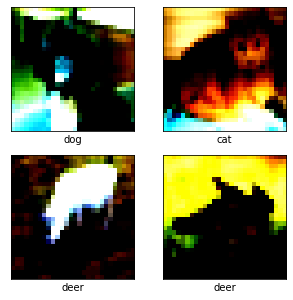

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

#4. Augment Data

##Color Jitter

In [ ]:
transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

trainset_ColorJitter = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_ColorJitter)
trainloader_ColorJitter = torch.utils.data.DataLoader(trainset_ColorJitter, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


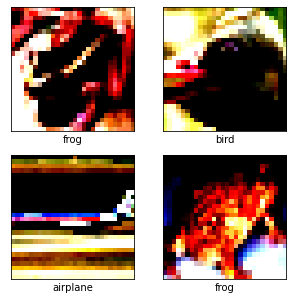

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_ColorJitter, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Crop

In [ ]:
transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

trainset_RandomCrop = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomCrop)
trainloader_RandomCrop = torch.utils.data.DataLoader(trainset_RandomCrop, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


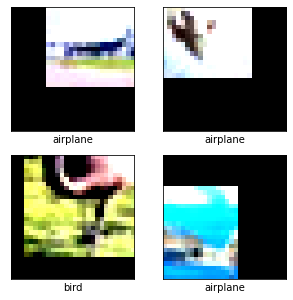

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomCrop, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Horizontal Flip

In [ ]:
transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

trainset_RandomHorizontalFlip = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomHorizontalFlip)
trainloader_RandomHorizontalFlip = torch.utils.data.DataLoader(trainset_RandomHorizontalFlip, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


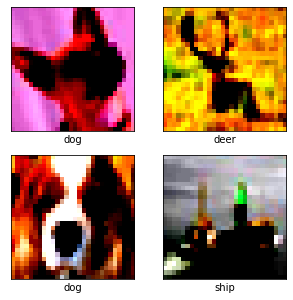

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomHorizontalFlip, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Perspective

In [ ]:
transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])
trainset_RandomPerspective = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomPerspective)
trainloader_RandomPerspective = torch.utils.data.DataLoader(trainset_RandomPerspective, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


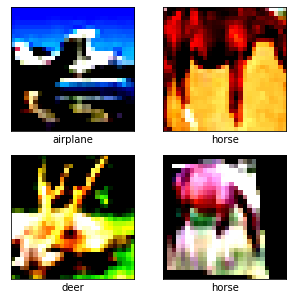

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomPerspective, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Rotation

In [ ]:
transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])
trainset_RandomRotation = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomRotation)
trainloader_RandomRotation = torch.utils.data.DataLoader(trainset_RandomRotation, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


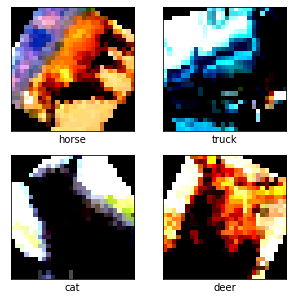

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomRotation, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Erasing

In [ ]:
transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])
trainset_RandomErasing = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomErasing)
trainloader_RandomErasing = torch.utils.data.DataLoader(trainset_RandomErasing, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


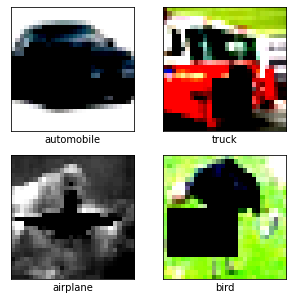

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomErasing, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Pixel Shuffling

In [ ]:
transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

trainset_Shuffle = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_Shuffle)
trainloader_Shuffle = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


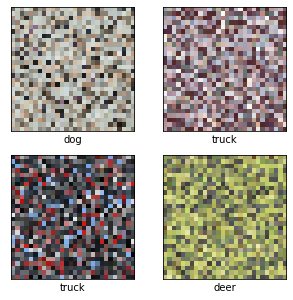

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_Shuffle, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)
    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Labels

In [ ]:
transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

trainset_RandomLabel = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

random.shuffle(trainset_RandomLabel.targets)

trainloader_RandomLabel = torch.utils.data.DataLoader(trainset_RandomLabel, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


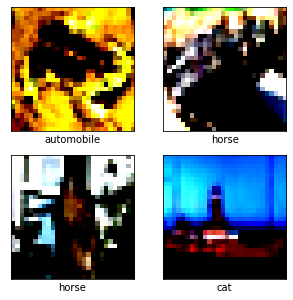

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomLabel, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

# Start Here

##Transformations

In [ ]:
transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])


transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])

transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])

transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])

transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

##CIFAR10

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 0 #0 is transform_train

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


##CIFAR100

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 0 #0 is transform_train

class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
	             'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'containers'	'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
                'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
                'bed', 'chair', 'couch', 'table', 'wardrobe',
	              'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
	              'bear', 'leopard', 'lion', 'tiger', 'wolf',
	              'bridge', 'castle', 'house', 'road', 'skyscraper',
	              'cloud', 'forest', 'mountain', 'plain', 'sea',
	              'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
	              'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
	              'crab', 'lobster', 'snail', 'spider', 'worm',
	              'baby', 'boy', 'girl', 'man', 'woman',
	              'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
	              'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
	              'maple', 'oak', 'palm', 'pine', 'willow',
	              'bicycle', 'bus', 'motorcycle', 'pickup' 'truck', 'train',
	              'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 4

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import random
p = 0.5
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                    download=True, transform=selectedTransform)

l = trainset.targets

l_p = l[:int(len(l)*p)]
random.shuffle(l_p)

l[:int(len(l)*p)] = l_p

trainset.targets = l

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
